<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio ETL: Análisis del Sistema Energético en España

## Objetivo

Durante todos los laboratorios de esta semana realizarás un proceso completo de ETL para analizar la relación entre la demanda, el consumo y la generación eléctrica en diferentes provincias de España a lo largo de un año. Además, complementarán este análisis con datos demográficos y económicos extraídos del Instituto Nacional de Estadística (INE). El **objetivo principal** del análisis es **examinar cómo la demanda, el consumo y la generación eléctrica en diferentes provincias de España a lo largo de los años están influenciados por factores demográficos y económicos, como la población y el PIB provincial**. El análisis busca identificar patrones y correlaciones entre estas variables para comprender mejor las dinámicas energéticas regionales y su relación con el desarrollo socioeconómico en España.

Antes de realizar el análisis, vamos a definir las hipótesis con las que vamos a trabajar, las cuales definirán todo tu análisis y planteamiento de los laboratorios: 

- **Hipótesis 1: La demanda eléctrica está correlacionada con la población de la provincia.** Provincias con mayor población tienden a tener una mayor demanda eléctrica.
  
- **Hipótesis 2: El crecimiento económico (medido por el PIB) está correlacionado con el consumo eléctrico.** Las provincias con un PIB más alto o en crecimiento experimentan un mayor consumo de energía.

- **Hipótesis 3: La proporción de generación renovable está relacionada con factores económicos o geográficos.** Provincias con un mayor desarrollo económico o con condiciones geográficas favorables (como más horas de sol o viento) tienden a generar más energía renovable.


## Tareas Laboratorio Transformación

En este laboratorio, tu objetivo será limpiar y preparar los datos extraídos previamente de diferentes fuentes para su posterior análisis. Trabajarás con datos provenientes de la API de Red Eléctrica Española (REE) y del Instituto Nacional de Estadística (INE). Estos datos incluyen información sobre demanda y generación eléctrica a nivel provincial, así como datos demográficos y económicos. 


- Cargar los Datos Extraídos:

  - **Demanda Eléctrica:** Carga los datos de demanda eléctrica extraídos de la API de REE.

  - **Generación Eléctrica:** Carga los datos de generación eléctrica diferenciados por tipo de energía (eólica, solar, hidroeléctrica, etc.) a nivel provincial.

  - **Datos Demográficos:** Carga los datos demográficos por provincia extraídos de la web del INE.

  - **Datos Económicos:** Carga los datos del PIB por provincia obtenidos del INE.


-Limpieza de Datos:

- Datos de la API de REE:

  - **Demanda Eléctrica:**

    - **Conversión de Timestamps:** Asegúrate de que las fechas estén correctamente formateadas en `datetime`. Si es necesario, convierte los datos a un formato uniforme (por ejemplo, `YYYY-MM` para datos mensuales).

    - **Tratamiento de Valores Nulos:** Identifica y maneja los valores nulos en caso de que los haya. Puedes optar por eliminar filas con valores faltantes.

    - **Estandarización de Nombres de Provincias:** Verifica que los nombres de las provincias estén estandarizados y coincidan en todos los conjuntos de datos. Si hay inconsistencias, corrígelas.

  - **Generación Eléctrica:**

    - **Desagregación de Tecnologías:** Asegúrate de que los datos estén correctamente desglosados por tipo de energía. Revisa que los campos correspondientes a energía eólica, solar, hidroeléctrica, etc., estén bien identificados y sin errores.

    - **Normalización de Unidades:** Verifica que las unidades de energía estén estandarizadas (por ejemplo, MWh). Realiza las conversiones necesarias si se encuentran en otras unidades.

    - **Identificación de Outliers:** Revisa los valores extremos o atípicos en la generación de energía y decide si deben ser tratados o eliminados.

- Datos del INE:

  - **Datos Demográficos:**

    - **Consistencia en la Codificación de Provincias:** Asegúrate de que los nombres de las provincias en los datos demográficos coincidan con los nombres utilizados en los datos eléctricos.

    - **Revisión de Categorías:** Verifica que las categorías de edad, sexo, y nacionalidad estén correctamente etiquetadas y sean consistentes en todo el dataset.

    - **Manejo de Valores Faltantes:** Revisa la presencia de valores faltantes y decide cómo tratarlos (relleno, eliminación o sustitución).

  - **Datos Económicos:**

    - **Normalización del PIB:** Si los datos del PIB están en diferentes unidades o escalas, asegúrate de normalizarlos para que sean comparables entre provincias.

    - **Agrupación Temporal:** Si los datos económicos están disponibles en diferentes periodos temporales, agrúpalos y normalízalos para que coincidan con los datos eléctricos en términos de granularidad temporal (mensual o anual).

NOTA: Ten en cuenta que los datos los vamos a tener que insertar en una base de datos mañana, por lo que toda esta limpieza os recomendamos que la penséis para poder crear e insertar los datos mañana. 

---

### Carga de datos

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from src.support import recorrer_anios, limpiar_df, df_ine, limpieza_ine_econ, limpieza_ine_demo

---

### Comunidades

In [2]:
id_comunidades = {'Ceuta': 8744,
                'Melilla': 8745,
                'Andalucía': 4,
                'Aragón': 5,
                'Cantabria': 6,
                'Castilla - La Mancha': 7,
                'Castilla y León': 8,
                'Cataluña': 9,
                'País Vasco': 10,
                'Principado de Asturias': 11,
                'Comunidad de Madrid': 13,
                'Comunidad Foral de Navarra': 14,
                'Comunitat Valenciana': 15,
                'Extremadura': 16,
                'Galicia': 17,
                'Illes Balears': 8743,
                'Canarias': 8742,
                'Región de Murcia': 21,
                'La Rioja': 20}

df_comunidades = pd.DataFrame(list(id_comunidades.items()), columns=['region', 'region_id'])

### API

In [3]:
tipos = ['demanda', 'generacion']
lista_df = []

for tipo in tipos:
    ruta = f'datos/{tipo}'
    lista_df.append(limpiar_df(recorrer_anios(ruta)))

In [4]:
df_demanda = lista_df[0]
df_generacion = lista_df[1]

df_demanda.to_csv('datos/output/demanda.csv', index = False)
df_generacion.to_csv('datos/output/generacion.csv', index = False)

### INE

Datos económicos

In [5]:
ruta = 'datos/DatosEconomicos'

df_econ = df_ine(ruta)
df_econ, df_provincias = limpieza_ine_econ(df_econ)

# Guardar como CSV
df_econ.to_csv('datos/output/economico.csv', index = False)
df_provincias.to_csv('datos/output/provincias.csv', index = False)

In [6]:
df_econ

,categories,year,total,provincia_id,region_id
0,PRODUCTO INTERIOR BRUTO A PRECIOS DE MERCADO,2020,7855556.0,02,7
1,"A. Agricultura, ganadería, silvicultura y pesca",2020,768976.0,02,7
2,"B_E. Industrias extractivas, industria manufac...",2020,1194438.0,02,7
3,C. - De las cuales: Industria manufacturera,2020,910902.0,02,7
4,F. Construcción,2020,415182.0,02,7
...,...,...,...,...,...
1711,"K_N. Actividades financieras y de seguros, act...",2019,258800.0,52,8745
1712,"O_U. Administración pública y defensa, segurid...",2019,770320.0,52,8745
1713,Valor añadido bruto total,2019,1473873.0,52,8745
1714,Impuestos netos sobre los productos,2019,151213.0,52,8745


Datos demográficos

In [7]:
ruta = 'datos/DatosDemograficos'

df_demo = df_ine(ruta)
df_demo = limpieza_ine_demo(df_demo)
df_demo.drop(columns='provincia', inplace=True)

# Guardar como CSV
df_demo.to_csv('datos/output/demografico.csv', index = False)

In [8]:
df_generacion

,value,percentage,category,region_id,year,month
0,2.929160e+02,0.003855,Hidráulica,8742,2019,1
1,2.650490e+02,0.003690,Hidráulica,8742,2019,2
2,2.983150e+02,0.002388,Hidráulica,8742,2019,3
3,2.967530e+02,0.003143,Hidráulica,8742,2019,4
4,3.059420e+02,0.002387,Hidráulica,8742,2019,5
...,...,...,...,...,...,...
7,8.263418e+05,1.000000,Generación renovable,17,2020,8
8,1.016119e+06,1.000000,Generación renovable,17,2020,9
9,1.429749e+06,1.000000,Generación renovable,17,2020,10
10,1.676691e+06,1.000000,Generación renovable,17,2020,11


Outliers en generación

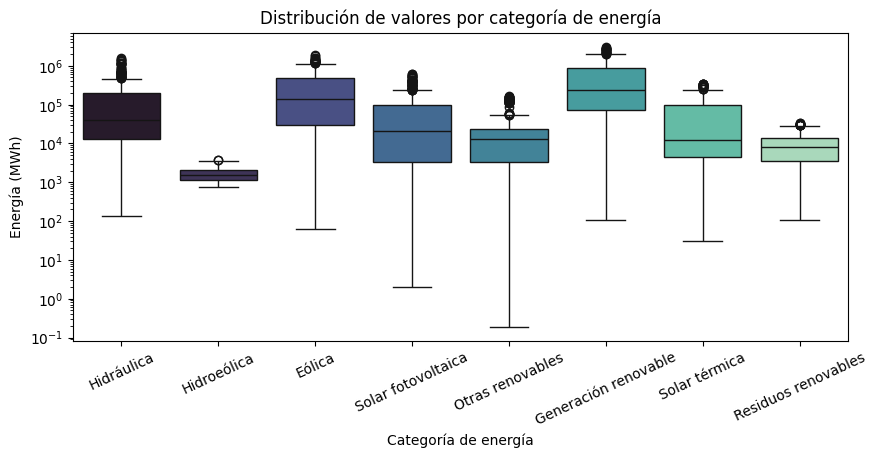

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_generacion,
            x='category',
            y='value',
            hue = 'category',
            palette = 'mako')
plt.title('Distribución de valores por categoría de energía')
plt.xlabel('Categoría de energía')
plt.ylabel('Energía (MWh)') # Posiblemente sea esta unidad
plt.yscale('log')
plt.xticks(rotation=25)
plt.show()